In [1]:
%matplotlib inline
import os, sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import guacml
import pandas as pd
import seaborn as sns

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ds = guacml.Dataset('./data/raw/train.csv', 'count', exclude_cols=['casual', 'registered'], eval_metric='rmsle')
ds.column_info

Regression problem detected.


,col_name,type,n_unique,n_unique_%,n_na_%,n_blank_%,example
0,datetime,ColType.DATETIME,10886,100,0.0,0.0,2011-01-01 00:00:00
1,season,ColType.CATEGORICAL,4,0,0.0,0.0,1
2,holiday,ColType.BINARY,2,0,0.0,0.0,0
3,workingday,ColType.BINARY,2,0,0.0,0.0,0
4,weather,ColType.CATEGORICAL,4,0,0.0,0.0,1
5,temp,ColType.NUMERIC,49,0,0.0,0.0,9.84
6,atemp,ColType.NUMERIC,60,1,0.0,0.0,14.395
7,humidity,ColType.ORDINAL,89,1,0.0,0.0,81
8,windspeed,ColType.NUMERIC,28,0,0.0,0.0,0
9,count,ColType.ORDINAL,822,8,0.0,0.0,16


In [3]:
ds.df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

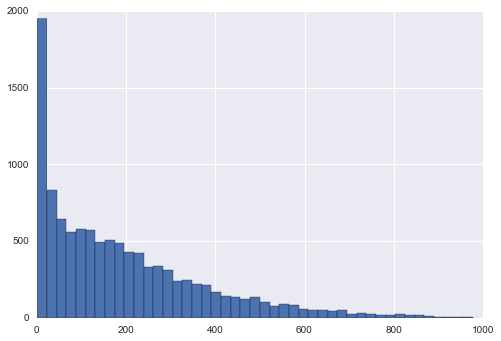

In [4]:
ds.df['count'].hist(bins='auto')

In [5]:
ds.run(25)
ds.model_overview()

Running step clean_columns
Running step encode_labels
Running step split_dates
Running step xg_boost
Running step fill_na
Running step random_forest
Running step one_hot_encode

/Users/daniel/code/guacml/guacml/metrics/root_mean_squared_log_error.py:7: RuntimeWarning: invalid value encountered in log1p
  return (np.log1p(prediction) - np.log1p(truth)) ** 2
/Users/daniel/code/guacml/guacml/metrics/root_mean_squared_log_error.py:7: RuntimeWarning: invalid value encountered in log1p
  return (np.log1p(prediction) - np.log1p(truth)) ** 2



Running step linear_model


,model name,holdout error,cv error,training error
2,xg_boost,0.3273,0.3346,0.0002805
0,random_forest,0.3517,0.3619,0.1478
1,linear_model,1.208,1.171,1.173


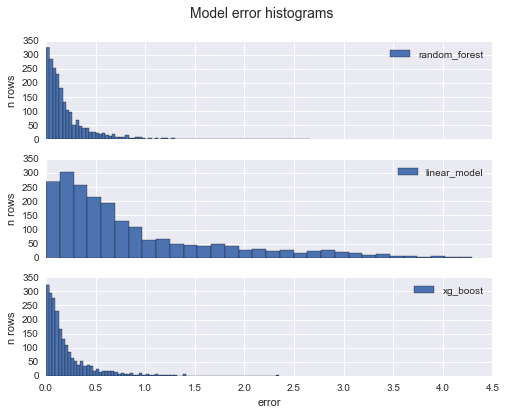

In [6]:
ds.plots.error_overview()